 ## 실습 개요

데이터 전처리 (실습) <br>


1) 실습 목적 <br>
 * 정형 데이터에서 전처리는 매우 중요한 부분을 차지합니다. <br>
 * 전처리에서 사용되는 변수의 변환 기법들을 살펴보고 적용해 봅니다. <br>
 * 연속형 & 범주형 변수를 변환하여 알고리즘 모델에 적절히 활용할 수 있습니다.<br>

2) 수강 목표
 * 정형 데이터 전처리의 중요성을 느낄 수 있습니다.
 * 연속형 변수 변환에 필요한 간단한 수학적 원리를 이해할 수 있습니다.
 * 다양한 변수의 인코딩 기법을 이해하고 패키지를 활용할 수 있습니다.


### 실습 목차

* **1. 실습 데이터**
  * Yahoo Finance OHLCV 데이터셋이란?
  * OHLCV 데이터셋 분석 해보기
* **2. 연속형 변수 다루기**
  * 연속형 변수 (Continous Variable)란?
  * 함수 변환 (Function Transformation)
  * 스케일링 (Scaling)
  * 구간화 (Binning, Bucketing)
* **3. 범주형 변수 다루기**
  * 범주형 변수 (Categorical Variable)란?
  * 원-핫 인코딩 (One-hot Encoding)
  * 레이블 인코딩 (Label Encoding)
  * 빈도 인코딩 (Frequency Encoding)
  * 타겟 인코딩 (Target Encoding)



###  데이터셋 개요 </b>

* 데이터셋: Yahoo Finance OHLCV 데이터셋이란? (Open High Close Low Volume)
* 데이터셋 개요 : **Yahoo Finance는 주식, 환율과 같은 금융 정보를 제공하는 플랫폼입니다.** 주식과 관련된 정보 및 시각화 정보를 웹사이트를 통해서 제공 (NASDAQ, KOSPI, NIKKEI 등) 됩니다. 데이터는 무료로 사용할 수 있으며, API를 제공하여 손쉽게 데이터를 수집 가능합니다. 또한, Yahoo Finance 정보를 랩핑한 yfinance 패키지를 이용해 파이썬에서도 사용 가능합니다.
  - (O)pen (시가): 주식의 거래가 시작된 가격을 나타냅니다. 시장이 열리면 처음으로 발생한 거래의 가격입니다.
  - (H)igh (고가): 특정 기간 동안 주식의 가격 중 최고점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 높게 거래되었는지를 보여줍니다.
  - (C)lose (종가): 주식의 거래가 마감된 가격을 나타냅니다. 시장이 닫힐 때 주식이 어떤 가격으로 거래를 마쳤는지를 보여줍니다.
  - (L)ow (저가): 특정 기간 동안 주식의 가격 중 최저점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 낮게 거래되었는지를 보여줍니다.
  - (V)Volume (거래량):  특정 기간 동안 거래된 주식의 총 수량을 나타냅니다. 거래량은 주식 시장에서 매우 중요한 지표 중 하나이며, 주식의 유동성과 관련이 있습니다. 더 높은 거래량은 주식 시장의 활발한 거래를 나타낼 수 있습니다.
  - Change (변동률): 이전 주가와 비교해 변화된 변동률 입니다.
  - code (종목 코드): 종목(회사)를 구분하는 코드입니다.
* 데이터셋 저작권 : Apache Software License (Apache)


In [1]:
%pip install category_encoders==2.6.1
%pip install mplfinance==0.12.10b0
%pip install gdown==4.7.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 계산
import numpy as np

# 전처리
from scipy.special import boxcox1p
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from category_encoders import CountEncoder
from mplfinance.original_flavor import candlestick_ohlc

# 출력 및 시각화
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
from IPython.display import display

# 데이터셋 로드 및 정제
import pandas as pd

# 코드 셀 실행 후 경고를 무시
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv("/home/pervinco/Datasets/NYSE/prices.csv")
data

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
data_path = "/home/pervinco/Datasets/OHLCV.parquet"
OHLCV_data = pd.read_parquet(data_path)

In [5]:
display(OHLCV_data)

,Open,High,Low,Close,Volume,Change,code
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930
...,...,...,...,...,...,...,...
2018-03-13,0.0,0.0,0.0,19950.0,0.0,0.000000,008000
2018-03-14,0.0,0.0,0.0,19950.0,0.0,0.000000,008000
2018-03-15,0.0,0.0,0.0,19950.0,0.0,0.000000,008000
2018-03-16,0.0,0.0,0.0,19950.0,0.0,0.000000,008000


In [6]:
# 데이터셋의 index가 날짜로 설정되어 있습니다.
# min, max 함수를 이용해 데이터셋의 날짜 범위를 알아보도록 하겠습니다.
display(f"데이터셋 날짜 범위: {OHLCV_data.index.min()} ~ {OHLCV_data.index.max()}")

'데이터셋 날짜 범위: 2018-01-02 00:00:00 ~ 2023-07-31 00:00:00'

In [7]:
# (O)pen (시가): 주식의 거래가 시작된 가격을 나타냅니다. 시장이 열리면 처음으로 발생한 거래의 가격입니다.
# (H)igh (고가): 특정 기간 동안 주식의 가격 중 최고점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 높게 거래되었는지를 보여줍니다.
# (C)lose (종가): 주식의 거래가 마감된 가격을 나타냅니다. 시장이 닫힐 때 주식이 어떤 가격으로 거래를 마쳤는지를 보여줍니다.
# (L)ow (저가): 특정 기간 동안 주식의 가격 중 최저점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 낮게 거래되었는지를 보여줍니다.
# (V)Volume (거래량):  특정 기간 동안 거래된 주식의 총 수량을 나타냅니다. 거래량은 주식 시장에서 매우 중요한 지표 중 하나이며, 주식의 유동성과 관련이 있습니다. 더 높은 거래량은 주식 시장의 활발한 거래를 나타낼 수 있습니다.
# Change (변동률): 이전 주가와 비교해 변화된 변동률 입니다.
# code (종목 코드): 종목(회사)를 구분하는 코드입니다.
display(f"데이터셋 컬럼: {tuple(OHLCV_data.columns)}")

"데이터셋 컬럼: ('Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'code')"

In [8]:
# 삼성전자(005930) 종목을 선택해서 OHCL 캔들스틱 차트를 그려봅시다.
# .copy()를 하지 않으면, 추후 원본 데이터프레임의 변화에 종속될 수 있으니 복사를 해줍시다.
samsung_data = OHLCV_data[OHLCV_data["code"] == '005930'].copy()

# index가 날짜로 설정되어 있으니 하나의 컬럼으로 추가해 줍시다.
samsung_data['Date'] = samsung_data.index

# 데이터가 너무 방대하니 2020-01-01 ~ 2020-03-01까지만 보도록 합시다.
samsung_data = samsung_data.loc["2020-01-01":"2020-03-01"]

# 날짜 형식을 숫자로 변환해야 시각화를 하기 수월합니다.
samsung_data['Date'] = samsung_data['Date'].map(mpdates.date2num)

# 캔들스틱 차트를 그리기 위해서 필요한 데이터만 뽑아 보아요.
samsung_data = samsung_data[['Date', 'Open', 'High', 'Low', 'Close']]

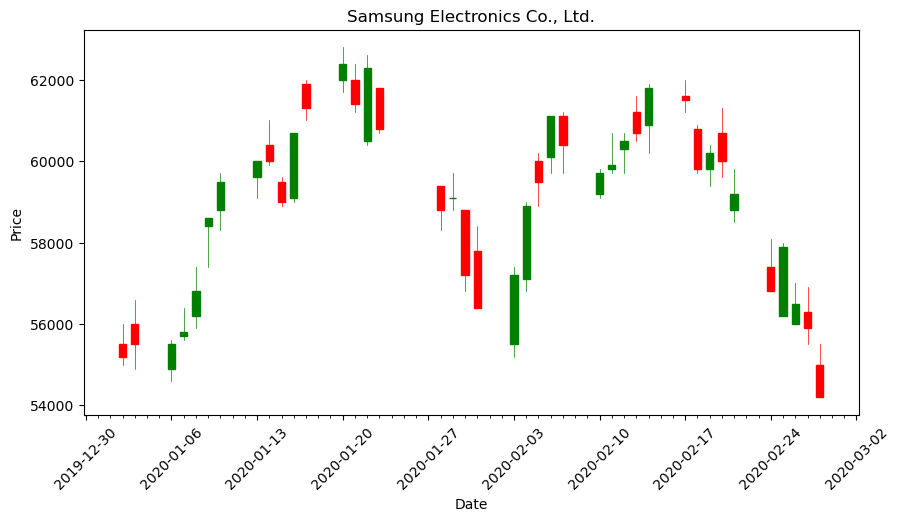

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

# 아래 함수를 이용해 캔들스틱 차트를 그릴 수 있습니다.
candlestick_ohlc(ax, samsung_data.values, width=0.6, colorup='g', colordown='r')

# X 축에 주간 구분선을 추가 하겠습니다.
ax.xaxis.set_major_locator(mpdates.WeekdayLocator(mpdates.MONDAY))
ax.xaxis.set_minor_locator(mpdates.DayLocator())

# 아까 숫자로 변환한 날짜 데이터를 보기 좋게 형식 변환을 합시다.
ax.xaxis.set_major_formatter(mpdates.DateFormatter('%Y-%m-%d'))

# 필요한 범례들을 작성해 줍시다.
plt.title('Samsung Electronics Co., Ltd.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()

### 1-2 OHLCV 데이터셋 분석 해보기

> **데이터의 특성을 이해하고 도메인에 맞게 수정하는 과정을 데이터 전처리(Preprocessing)라고 합니다. 이는 머신러닝 및 딥러닝 알고리즘의 성능을 향상시키면서, 모델의 해석력을 높이는 효과를 보입니다.** 데이터 전처리에 포함되는 과정은 아래와 같습니다.
1-2 챕터에서는 간단한 데이터 분석 및 결측치, 이상치를 다뤄보도록 하겠습니다.

- **1. 데이터 분석 (시각화 및 통계치)**
- **2. 결측치 다루기**
- **3. 이상치 다루기**


In [11]:
# 아래는 가장 기본적이면서 가장 중요한 통계치들을 추출하는 과정입니다.
display(f"데이터셋 종목 수: {len(OHLCV_data['code'].unique())}")

# Open(시가) 열에 대해서 기본 통계치를 구해봅시다.
display(f"Open 평균: {OHLCV_data['Open'].mean():.2f}")
display(f"Open 중앙값: {OHLCV_data['Open'].median():.2f}")
display(f"Open 최솟값: {OHLCV_data['Open'].min():.2f}")
display(f"Open 최댓값: {OHLCV_data['Open'].max():.2f}")
display(f"Open 표준 편차: {OHLCV_data['Open'].std():.2f}")

'데이터셋 종목 수: 999'

'Open 평균: 39834.54'

'Open 중앙값: 11860.00'

'Open 최솟값: 0.00'

'Open 최댓값: 1770000.00'

'Open 표준 편차: 93411.84'

In [12]:
# describe() 기능을 이용하면 손쉽게 모든 기본 통계치를 구할 수 있습니다.
display(OHLCV_data.describe())

,Open,High,Low,Close,Volume,Change
count,1.272310e+06,1.272310e+06,1.272310e+06,1.272310e+06,1.272310e+06,1.272207e+06
mean,3.983454e+04,4.048973e+04,3.917772e+04,3.993122e+04,6.769883e+05,3.467653e-04
std,9.341184e+04,9.476688e+04,9.203220e+04,9.334144e+04,5.120896e+06,3.119040e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,-8.832653e-01
25%,4.140000e+03,4.225000e+03,4.055000e+03,4.215000e+03,1.700900e+04,-1.209677e-02
50%,1.186000e+04,1.210000e+04,1.164000e+04,1.200000e+04,8.356700e+04,0.000000e+00
75%,3.760000e+04,3.830000e+04,3.700000e+04,3.775000e+04,3.197980e+05,1.008403e-02
max,1.770000e+06,1.784000e+06,1.756000e+06,1.770000e+06,1.201807e+09,1.965517e+00


In [13]:
# info() 기능은 컬럼에 대한 기본 정보를 보여줍니다.
# 모든 컬럼은 Non-Null의 개수가 같지만, Change 컬럼은 다릅니다.
# 이는 Change 컬럼에 결측치가 있다는 것을 의미합니다.
display(OHLCV_data.info())

print("\n\n")

# 간단하게 isna() 함수를 이용해 결측치를 찾아봅시다.
# 총 103개의 열이 영향을 받고 있습니다.
display(OHLCV_data[OHLCV_data["Change"].isna() == True])

## 왜 결측치가 생겼을까??(추측)
# 1. 이전과 현재가 다르니까 변화량이 존재하는 것인데, 이전 정보가 없는 경우 변화가 없으니 변화량이 결측치일 수 있다.
# 2. 수기 오류나 통신 오류로 인한 결측치.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272310 entries, 2018-01-02 to 2018-03-19
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Open    1272310 non-null  float64
 1   High    1272310 non-null  float64
 2   Low     1272310 non-null  float64
 3   Close   1272310 non-null  float64
 4   Volume  1272310 non-null  float64
 5   Change  1272207 non-null  float64
 6   code    1272310 non-null  object 
dtypes: float64(6), object(1)
memory usage: 77.7+ MB


None

,Open,High,Low,Close,Volume,Change,code
2022-01-27,597000.0,598000.0,450000.0,505000.0,15946992.0,NaN,373220
2021-08-06,53700.0,69800.0,51000.0,69800.0,59402373.0,NaN,323410
2021-09-17,111000.0,135000.0,91000.0,111500.0,17373529.0,NaN,329180
2020-10-15,267300.0,347490.0,250965.0,255420.0,6557212.0,NaN,352820
2019-02-13,15600.0,15600.0,14950.0,15300.0,3961223.0,NaN,316140
...,...,...,...,...,...,...,...
2019-10-18,3456.0,4492.0,3456.0,4492.0,447.0,NaN,33637L
2021-05-27,39800.0,39800.0,27900.0,27900.0,1459435.0,NaN,38380K
2023-03-31,7610.0,9890.0,7610.0,9890.0,578594.0,NaN,45226K
2018-12-19,6644.0,6698.0,5653.0,5988.0,132813.0,NaN,00806K


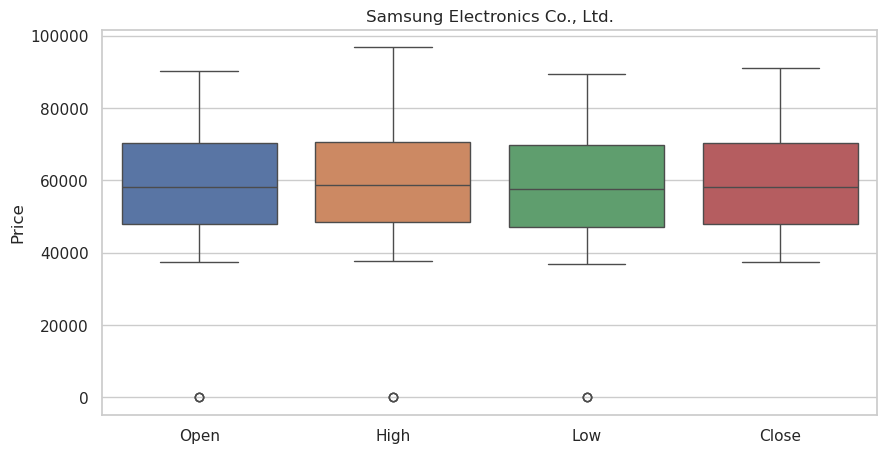

In [14]:
# 이번엔 이상치를 찾아볼까요?
# 삼성전자 종목을 기준으로 찾아보도록 하겠습니다.
samsung_data = OHLCV_data[OHLCV_data["code"] == '005930'].copy()

# 이상치를 찾기 위한 간단한 방법은 박스플롯을 그려보는 것입니다.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.boxplot(data=samsung_data[["Open", "High", "Low", "Close"]], orient="v")
plt.title("Samsung Electronics Co., Ltd.")
plt.ylabel("Price")
plt.show()

# 그럴듯한 박스플롯이지만, Open, High, Low에서 0에 점이 찍혀 있는 것을 볼 수 있습니다.
# 자세히 알아보도록 합시다.

## 아래로는 0으로 이상치가 존재하는 것을 확인할 수 있다.

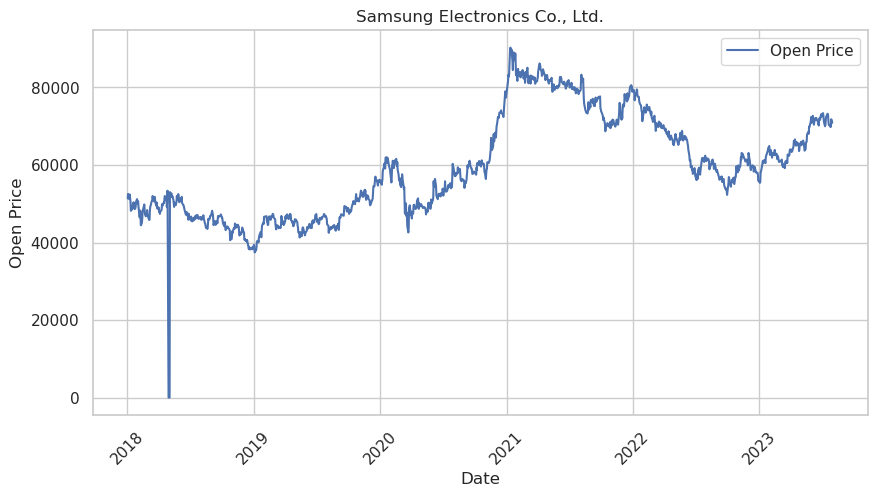

,Open,High,Low,Close,Volume,Change,code
2018-04-30,0.0,0.0,0.0,53000.0,0.0,0.0,005930
2018-05-02,0.0,0.0,0.0,53000.0,0.0,0.0,005930
2018-05-03,0.0,0.0,0.0,53000.0,0.0,0.0,005930


In [15]:
# 삼성전자의 2018년에서 2023년까지의 시가를 선형 차트로 출력해보겠습니다.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=samsung_data['Open'], label='Open Price')

plt.title('Samsung Electronics Co., Ltd.')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)

plt.show()

print("\n")

# 이상치의 존재가 더욱 부각됩니다.
# 어떤 수치인지 표로 추출해보도록 하겠습니다.
display(samsung_data[samsung_data['Open'] <= 0])

## 2018.04부터 05까지 Close만 존재하고 나머지는 모두 0인 것을 확인할 수 있다. --> why??

In [16]:
# 이상치를 간단하게 평균으로 대체(Imputation)해보도록 하겠습니다.
# 대체를 하는 방식은 여러 가지가 있겠지만, 우리는 2018년 04월 25일 ~ 4월 27일까지의 시가 평균으로 대체해 보도록 하겠습니다.

"""
통계치나 모델을 사용해서 대체할 수 있다.
이 경우, 전체 데이터셋의 open의 통계치를 활용해 예측을 할 수도 있겠지만 범주(?)를 낮추는 것이 더 적절하다.
  1.삼성전자의 결측된 open값을 대체할 것이니, 삼성전자만의 open을 활용한다.
  2.시계열 데이터의 특성상 날짜가 가까우면 가까울수록 값이 유사하다. --> 근처 날짜의 open을 이용하면 정밀도가 높을 것.

결과적으로 4월 25일부터 4월 27일까지의 평균으로 대체한다.
"""
imputation = int(samsung_data.loc["2018-04-25":"2018-04-27"]["Open"].mean())
samsung_data.loc[samsung_data["Open"] <= 0, "Open"] = imputation

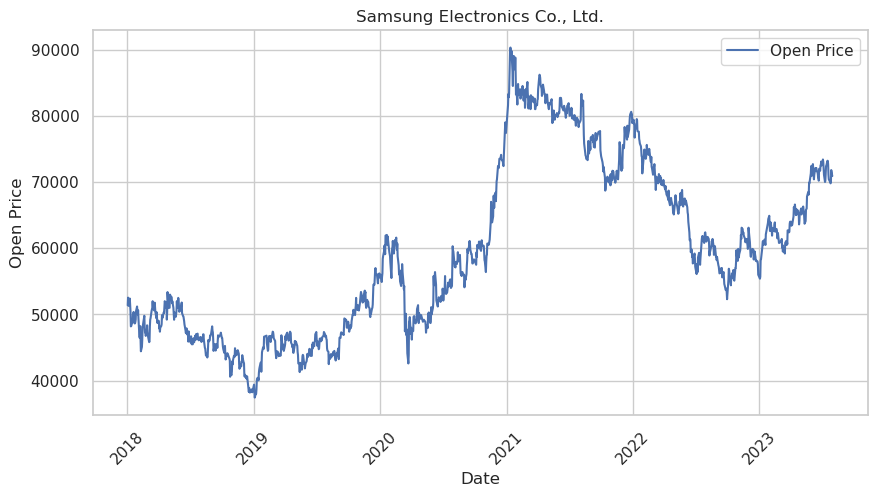

In [17]:
# 이상치가 대체된것을 볼수 있습니다.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=samsung_data['Open'], label='Open Price')

plt.title('Samsung Electronics Co., Ltd.')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)

plt.show()

## 2. 연속형 변수 다루기

```
💡 목차 개요 : 연속형 변수에 대해서 알아보고 이를 다루는 방법들에 대해서 알아봅니다.
```

- **2-1 연속형 변수 (Continous Variable)란?**
- **2-2 함수 변환 (Function Transformation)**
- **2-3 스케일링 (Scaling)**
- **2-4 구간화 (Binning)**



### 2-1 연속형 변수(Continous Variable)란?

> 실수 범위 내에서 수치로 표현 가능한 연속적인 값을 가지는 변수. 키, 거리, 온도, 습도와 같이 수치적인 정보를 지니고 있습니다. 아래는 연속형 변수의 예제입니다.

- 신발 사이즈는 220mm, 275mm, 290mm 등 연속적인 수치로 표현됩니다.
- 상대 습도는 30.4%, 33.5%, 38.0% 등 무한한 값을 가질 수 있습니다.
- 속력은 연속적으로 감소하거나 증가하며, 30km/s, 125km/s, 300km/s 등으로 표현됩니다.

#### 📝 설명 : (2-1)
> 데이터셋에서 연속형 변수들은 머신러닝&딥러닝 모델에 적합하지 않은 형태로 분포가 구성된 경우가 많습니다. **이번 실습에서 연속형 변수를 다룸으로써 정규성, 스케일 통일 등의 이용해 모델의 성능을 높이고, 해석력을 증가시킬 수 있습니다.** 연속형 변수를 깔끔하고 깨끗하게 처리하는 여러 변환 방법에 대해서 배워보도록 합시다.

 📖 설명 : 연속형 변수를 다루는 여러 변환 방법은 크게 3가지로 나눠볼 수 있습니다.
 1. 수학 수식 기반 함수들을 통해 변환시키는 함수 변환
 2. 특정 범위로 변수의 스케일(범위)를 통일 시키는 스케일링
 3. 연속형 변수를 범주형 변수로 이산화 시키는 구간화

### 2-2 함수 변환 (Function Transformation)

> 로그 & 제곱근, 제곱 등의 수학 수식을 통해서 비대칭된 임의의 분포를 변화시킵니다. 로그 및 제곱근 변환은 데이터의 스케일을 작고 균일하게 만들며, 반대로 제곱 변환은 데이터의 스케일을 크게 만듭니다.

- 로그 & 제곱근 변환 (Log & Square Root Transformation)
- 제곱 변환 (Power Transformation)
- Box-Cox 변환

#### 📝 설명 : (2-2)
- 비대칭(Right&Left-Skewed) 된 임의의 분포를 정규분포에 가깝게 전환시키도록 도움을 줍니다.
- 결국 데이터의 정규성은 모델의 성능을 향상시키는 데 도움을 줍니다.
- 데이터의 스케일을 작거나 크게 만들어 데이터간 편차를 줄이는 효과를 보입니다.

#### 로그 변환 (Log Transformation)
- 데이터의 스케일을 작고, 균일하게 만들어 데이터간 편차를 줄이는 효과를 줍니다.
- 큰 값을 작게 변환시키기 때문에 이상치의 완화를 기대해볼 수 있습니다.
<img src='https://lh3.google.com/u/0/d/1UrmKv2likyNdxXrozIwRkiQWeQOrexAd=w1259-h864-iv1' width="1000">

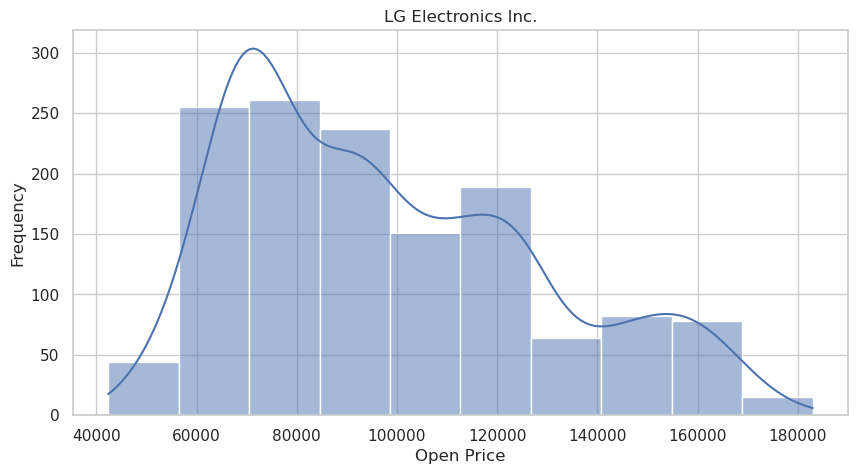

In [19]:
# LG전자(066570) 종목을 선택해서 OHCL 함수 변환 실습을 해봅시다.
lg_data = OHLCV_data[OHLCV_data["code"] == "066570"].copy()

# 시가를 기준으로 히스토그램을 그려봅시다.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(lg_data["Open"], bins=10, kde=True)
plt.title('LG Electronics Inc.')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

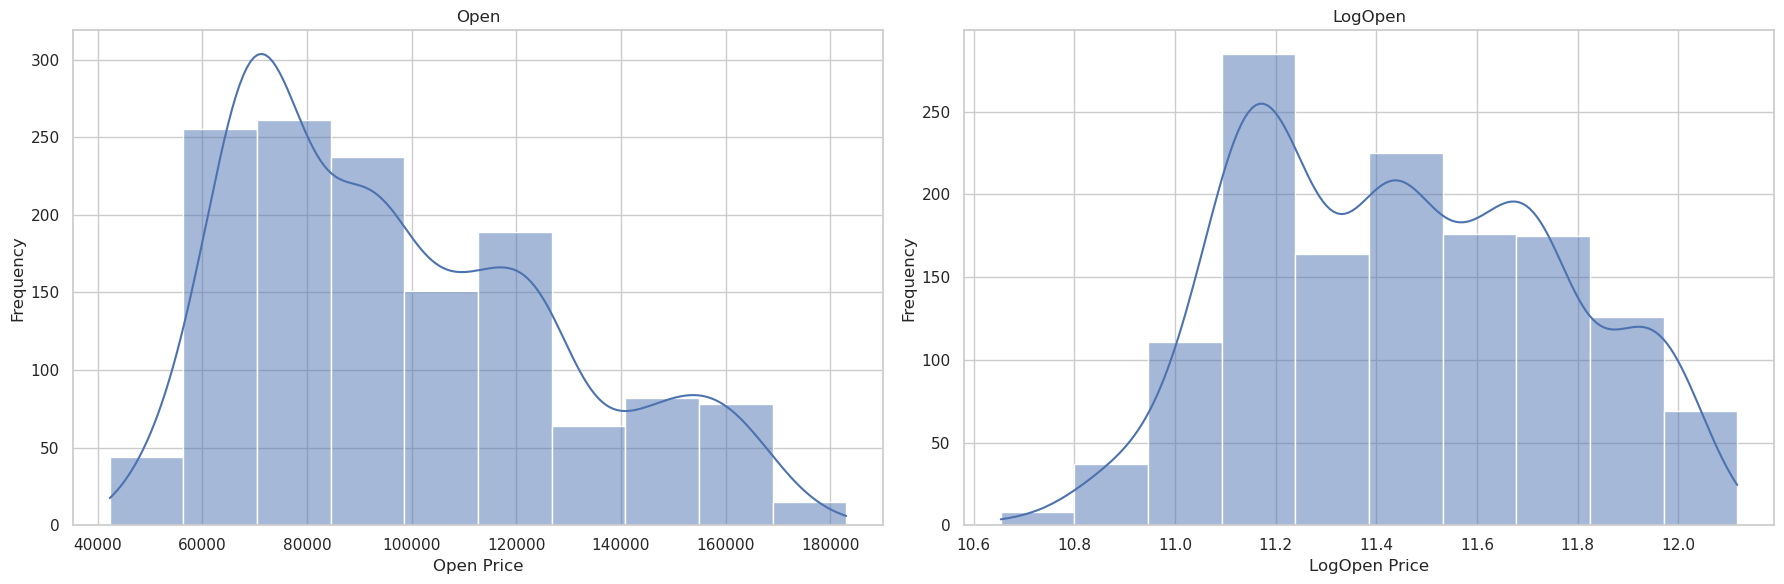

In [20]:
# np.log(x)를 사용해도 되지만, 0 및 음수 값에 대한 대응을 위해 log1p를 사용합니다.
## np.log1p : x가 0에 가까운 굉장히 작은 값일 때 사용. np.log보다 더 정확한 로그 값을 반환한다.
lg_data["Log" + "Open"] = np.log1p(lg_data["Open"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.set(style="whitegrid")

for i, col in enumerate(["Open", "LogOpen"]):
    sns.histplot(lg_data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col} Price")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [22]:
print(np.log1p(1e-10))
print(np.log(1e-10))

9.999999999500001e-11
-23.025850929940457


#### 제곱근 변환 (Square Root Transformation)
- 관측값의 제곱근으로 변환하게 됩니다.
- 제곱근 변환은 비교적 큰 관측값에 영향을 덜 주기 때문에 로그 변환의 분포에 비하여 완화되는 경향을 보입니다.

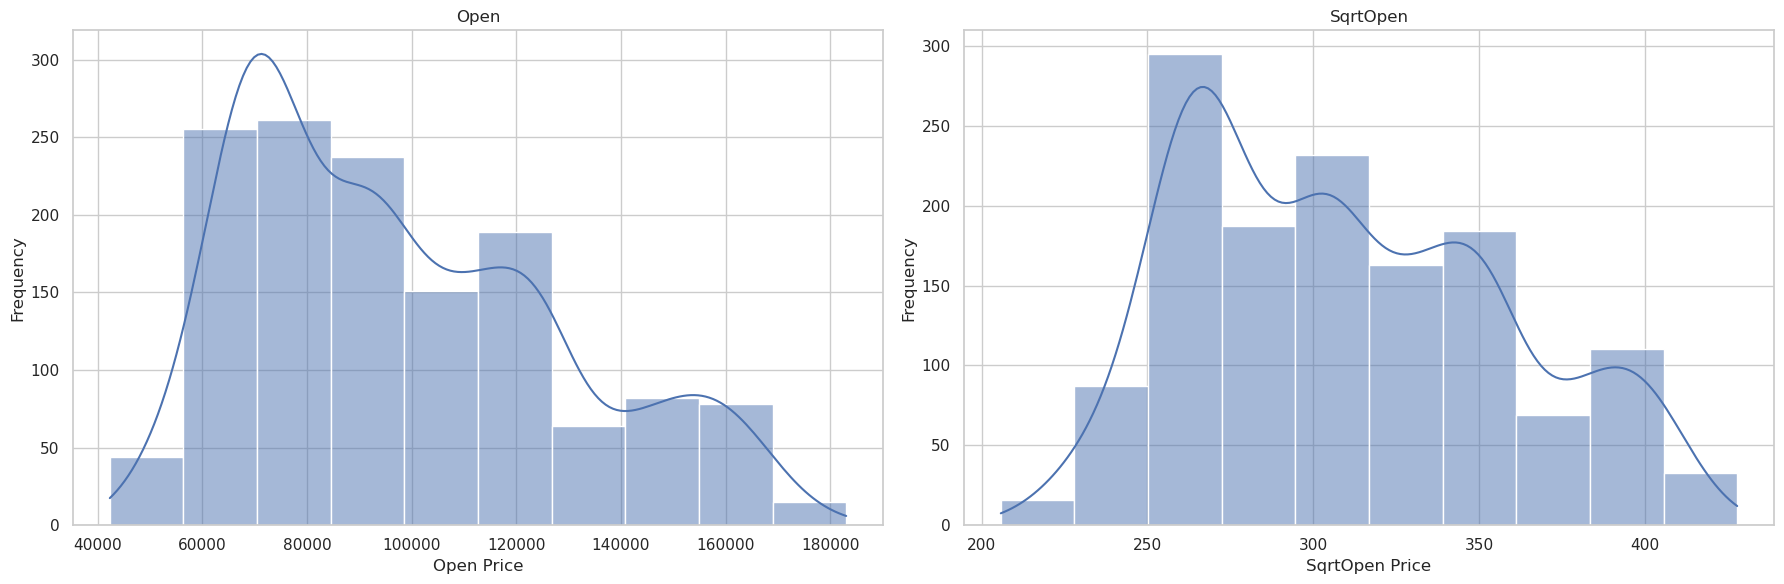

In [23]:
# 제곱근 변환도 해보도록 합시다.
# 로그 변환과 비슷하지만 스케일이 조금 더 작게 변화시키는 효과가 있습니다.
# np.sqrt(x)를 사용할 수 있습니다.
lg_data["Sqrt" + "Open"] = np.sqrt(lg_data["Open"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.set(style="whitegrid")

for i, col in enumerate(["Open", "SqrtOpen"]):
    sns.histplot(lg_data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col} Price")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

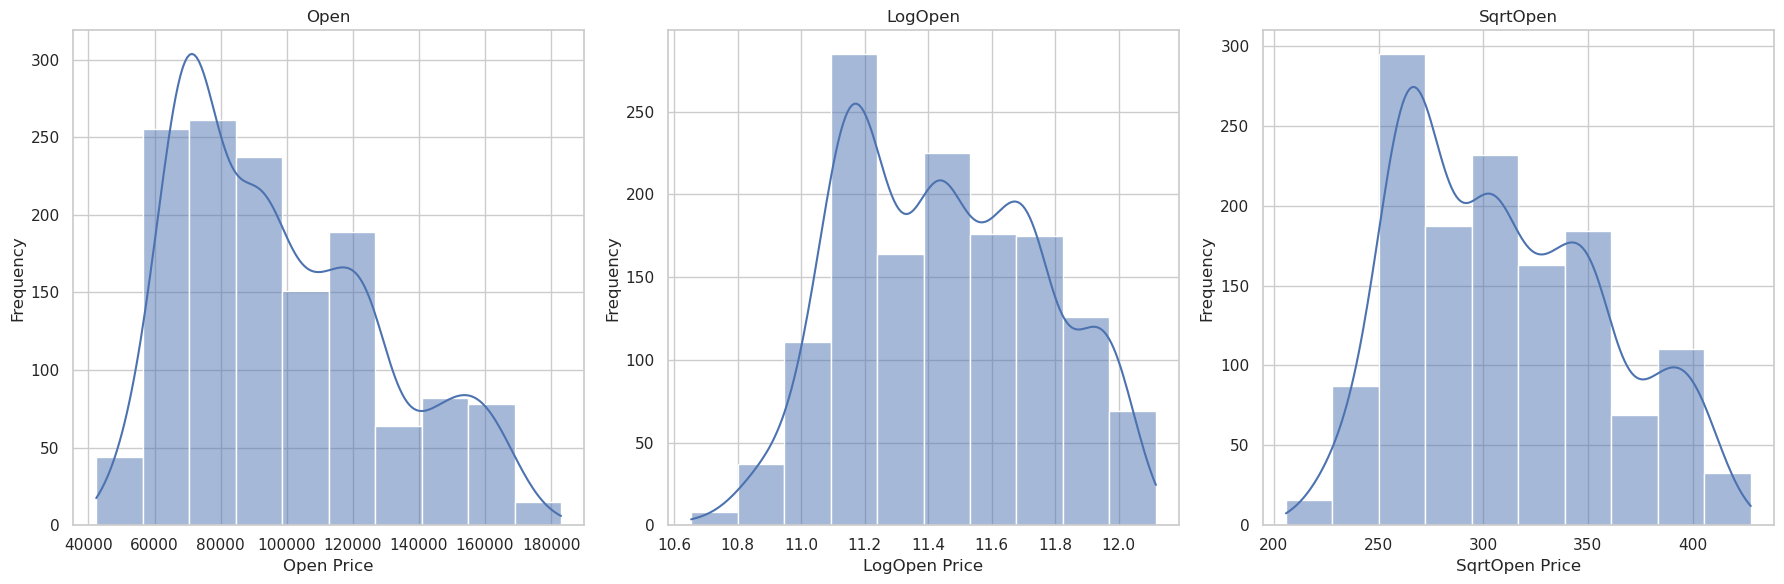

In [24]:
# 로그&제곱근 변환을 비교해 볼까요?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.set(style="whitegrid")

for i, col in enumerate(["Open", "LogOpen", "SqrtOpen"]):
    sns.histplot(lg_data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col} Price")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Box-Cox 변환 (Box-Cox Transformation)
- 앞선 로그&제곱근 변환은 모두 왜도(Skewness)를 줄여 정규분포에 가깝게 변환하는 방법입니다.
- 다만, 오른쪽으로 치우쳐진 데이터 분포에 활용시 더 심하게 오른쪽으로 치우치는 부작용이 발생합니다.
- 당연히 큰 값을 작게 만들기 때문에 큰 값의 분포가 많아지기 때문이죠.
- 분포가 치우친 방향에 무관하게 Box-Cox 변환을 이용하면 손쉽게 조절이 가능합니다.

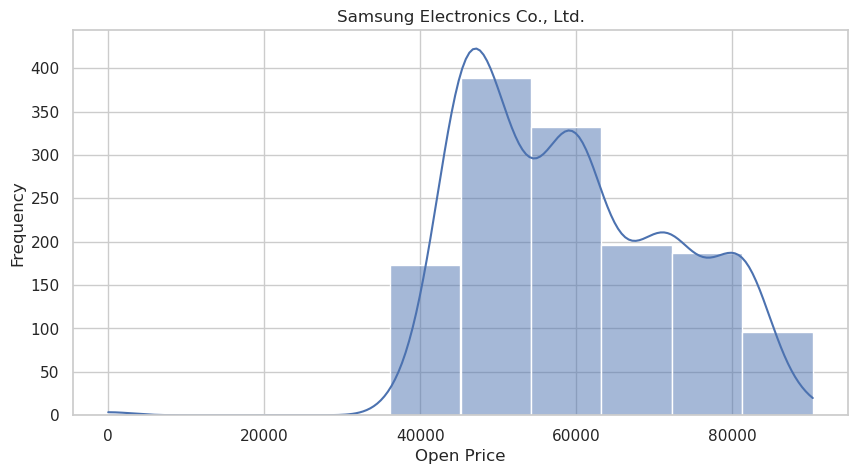

In [25]:
# 다시 삼성전자(005930)로 돌아와서 히스토그램을 그려봅시다.
samsung_data = OHLCV_data[OHLCV_data["code"] == '005930'].copy()

# LG전자와 다르게 오른쪽(Left-Skewed)으로 치우친 것을 알수 있습니다.
# 이럴 때 로그 및 제곱근 변환을 사용하게 되면 어떻게 될까요?
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(samsung_data["Open"], bins=10, kde=True)
plt.title('Samsung Electronics Co., Ltd.')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

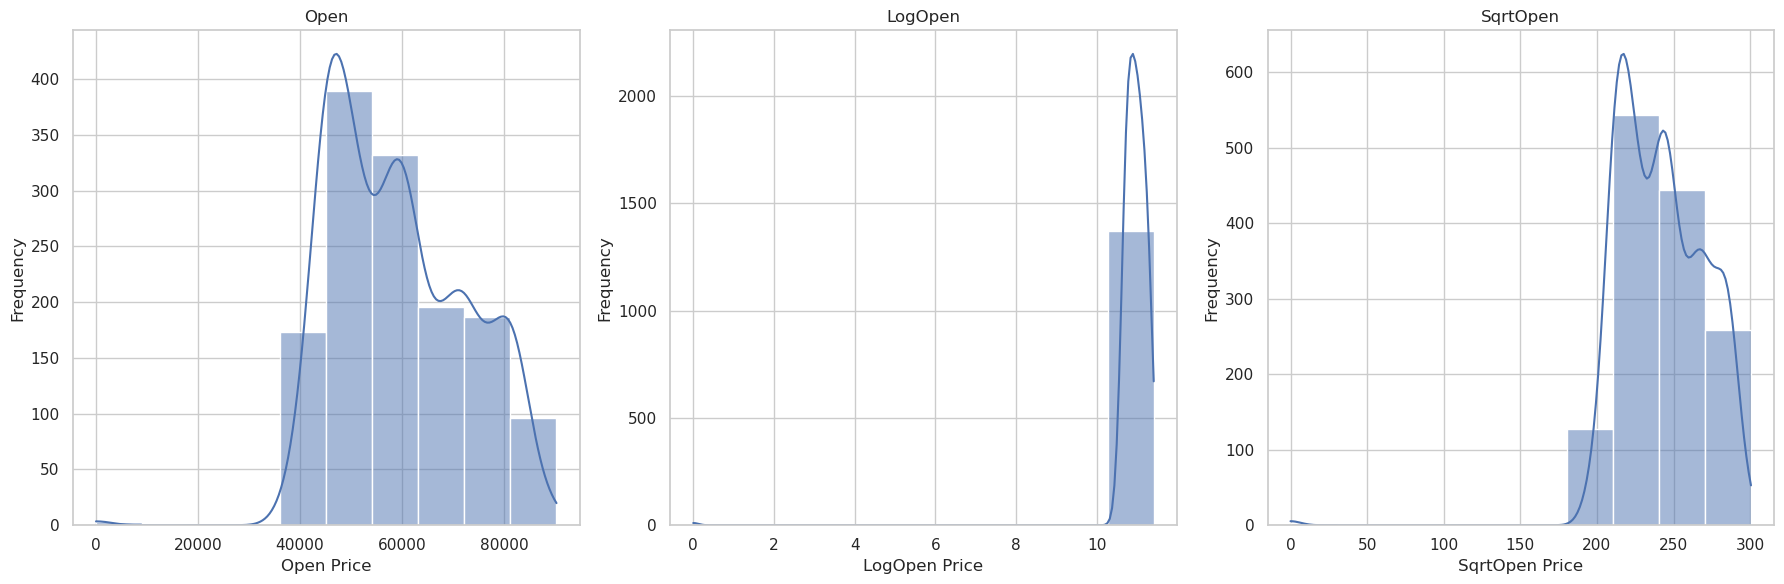

In [26]:
samsung_data["Log" + "Open"] = np.log1p(samsung_data["Open"])
samsung_data["Sqrt" + "Open"] = np.sqrt(samsung_data["Open"])

# 로그&제곱근 변환을 히스토그램을 그려 비교해 볼까요?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.set(style="whitegrid")

for i, col in enumerate(["Open", "LogOpen", "SqrtOpen"]):
    sns.histplot(samsung_data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col} Price")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 오른쪽으로 더 치우치는 것을 볼수 있습니다.
## Left Skewed 분포이기도 하지만, 0이라는 이상치를 보유하고 있기도 하기 때문에 로그나 제곱근 변환은 더 이상한 결과를 만들어낸다.

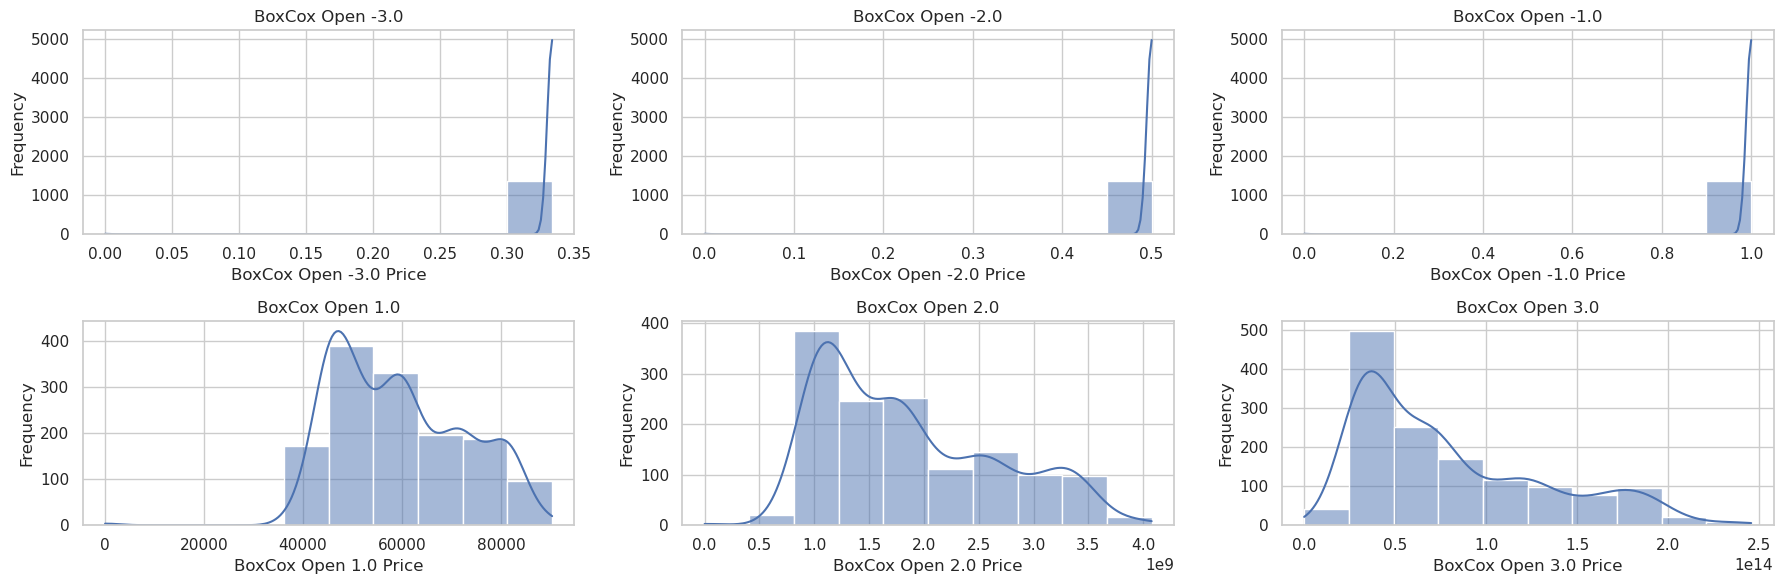

In [27]:
# Box-Cox변환은 람다 파라미터를 조절해 가면서 유연하게 분포를 변화시킬 수 있습니다.
# 사용자가 정하는 주관적인 파라미터이기 때문에 정해진 값은 없지만 저는 1.0에서 2.5까지 설정을 해보곘습니다.
lambdas = [[-3.0, -2.0, -1.0], [1.0, 2.0, 3.0]]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))
sns.set(style="whitegrid")

# 삼성전자의 Open(시가) 컬럼에 Box-Cox를 적용해 봅시다.
for i in range(0, 2):
    for j in range(0, 3):
        col = "BoxCox " + "Open " + str(lambdas[i][j])
        samsung_data[col] = boxcox1p(samsung_data["Open"], lambdas[i][j])
        sns.histplot(samsung_data[col], bins=10, kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"{col}")
        axes[i, j].set_xlabel(f"{col} Price")
        axes[i, j].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 각 6개의 차트가 확연히 차이 나는 것을 볼수 있습니다.
# 2.0~3.0 사이의 람다값이 최적으로 보이네요.

### 2-3 스케일링 (Scaling)

> 스케일링은 연속형 변수들의 수치 범위를 동등하게 변화시키는 과정입니다. 예를 들어 키와 몸무게에 대한 변수가 존재한다고 가정했을 때, 둘의 수치 범위는 크게 차이가 있습니다. 키는 173cm, 몸무게 60kg인 어느 한 남성의 경우 처럼 말이죠. 이렇게 다른 수치 범위는 추후 알고리즘 모델에서 중요성이 다르게 인식될 수 있습니다. KNN과 같은 거리 기반 알고리즘에서는 수치 범위가 큰 변수일수록 다른 변수에 비해 더 중요하게 인식되는 경향이 있습니다. 스케일링은 변수들의 영향력을 동등하게 만들어 줄수 있는 강력한 변환 방법입니다. 아래와 같이 크게 3가지로 스케일링 방법을 나눠 볼수 있습니다.

- Min-Max Scaling
- 표준화 (Standardization)
- 로버스트 스케일링 (Robust Scaling)

#### 📝 설명 : (2-3)
- 스케일링은 독립 변수들의 영향력을 동등하게 변환시켜 경사하강법, KNN과 같이 거리기반 알고리즘에 효과를 줍니다.

 📖 설명 : KNN은 벡터간 거리를 측정하여 데이터를 분류하는 방식입니다. 변수들이 동일한 범위로 스케일링이 되어 있지 않다면 결과가 올바르게 나오지 않을 수 있습니다.

#### Min-Max Scaling
- 수치형 변수를 최소, 최댓값을 기준으로 데이터의 상대적 위치를 구성합니다.
- 각기 다른 수치형 변수의 수치 범위를 통일할 때 사용됩니다.

In [28]:
# 이번엔 포스코 홀딩스(005490) 종목을 선택해 봅시다.
posco_data = OHLCV_data[OHLCV_data["code"] == "005490"].copy()

# 이번엔 시가(Open)와 거래량(Volume) 컬럼을 선택해 봅시다.
display(posco_data[["Open", "Volume"]].describe())

# 시가와 거래량은 단위 자체가 다르기 때문에 수치 범위도 크게 차이나는 것을 볼 수 있습니다.

,Open,Volume
count,1376.000000,1.376000e+03
mean,280475.654070,4.385921e+05
std,64589.292298,5.834463e+05
min,137500.000000,9.961000e+04
25%,236000.000000,2.232740e+05
50%,274500.000000,3.157815e+05
75%,326125.000000,4.653080e+05
max,666000.000000,1.163178e+07


In [29]:
# 위의 두 컬럼을 Min-Max 스케일링을 해봅시다.
scaler = MinMaxScaler()
posco_data[["MinMaxOpen", "MinMaxVolume"]] = scaler.fit_transform(posco_data[["Open", "Volume"]])

<Axes: xlabel='MinMaxOpen', ylabel='MinMaxVolume'>

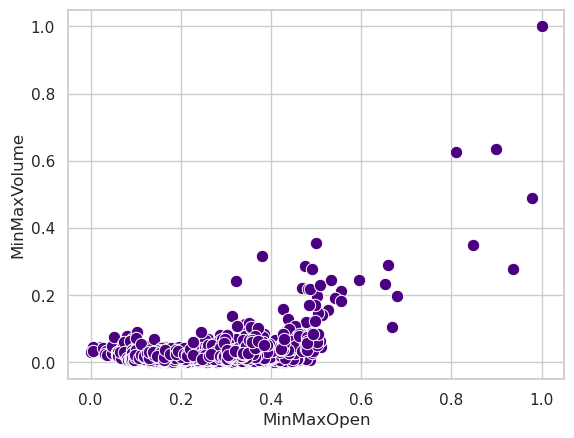

In [30]:
# 산점도를 그려 봅시다.
# X, Y축이 0-1사이로 구성되어 있습니다.
sns.scatterplot(data=posco_data, x="MinMaxOpen", y="MinMaxVolume", color='indigo', marker='o', s=80)

In [31]:
# 통계치를 볼까요? max 1, min 0로 변환되었습니다.
display(posco_data[["MinMaxOpen", "MinMaxVolume"]].describe())

,MinMaxOpen,MinMaxVolume
count,1376.000000,1376.000000
mean,0.270531,0.029394
std,0.122212,0.050593
min,0.000000,0.000000
25%,0.186377,0.010723
50%,0.259224,0.018745
75%,0.356906,0.031711
max,1.000000,1.000000


#### 표준화 (Standardization)
- 변수의 수치 범위를 평균이 0, 표준편차가 1이 되도록 변경하는 방법입니다.
- 평균과의 거리를 표준편차로 나눠주게 됩니다.
- 평균에 가까워질수록 0, 평균에서 멀어질 수록 큰 값으로 변화하게 됩니다.

In [32]:
# 다시 포스코 홀딩스(005490) 종목을 복사해 봅시다.
posco_data = OHLCV_data[OHLCV_data["code"] == "005490"].copy()

# 위의 두 컬럼을 표준화를 해봅시다.
scaler = StandardScaler()
posco_data[["StdzationOpen", "StdzationVolume"]] = scaler.fit_transform(posco_data[["Open", "Volume"]])

<Axes: xlabel='StdzationOpen', ylabel='StdzationVolume'>

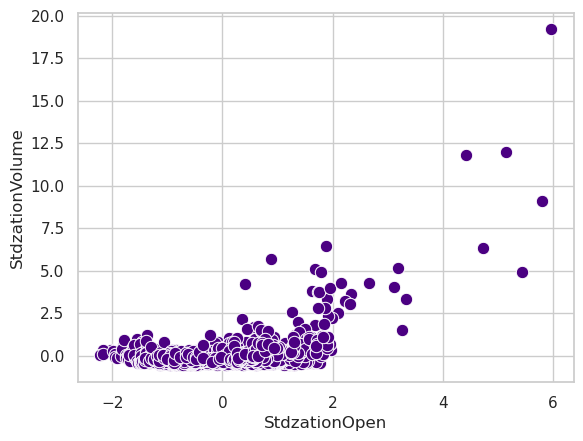

In [33]:
# 산점도를 그려 봅시다.
sns.scatterplot(data=posco_data, x="StdzationOpen", y="StdzationVolume", color='indigo', marker='o', s=80)

In [34]:
# 통계치를 볼까요? 평균은 0, 표준편차는 1로 변환되었습니다.
display(posco_data[["StdzationOpen", "StdzationVolume"]].describe())

,StdzationOpen,StdzationVolume
count,1.376000e+03,1.376000e+03
mean,-1.239319e-16,4.131062e-17
std,1.000364e+00,1.000364e+00
min,-2.214417e+00,-5.812109e-01
25%,-6.888421e-01,-3.691794e-01
50%,-9.255136e-02,-2.105682e-01
75%,7.070203e-01,4.580652e-02
max,5.971029e+00,1.919158e+01


#### 로버스트 스케일링 (Robust Scaling)
- IQR을 기준으로 수치 범위를 변환하게 됩니다.
- 중앙값에 가까워질수록 0, 멀어질수록 큰 값으로 변환됩니다.

In [35]:
# 003535 종목을 선택해 봅시다.
stock_data = OHLCV_data[OHLCV_data["code"] == "003535"].copy()

# 위의 두 컬럼을 로버스트 스케일링을 적용합시다.
scaler = RobustScaler()
stock_data[["RobustOpen", "RobustVolume"]] = scaler.fit_transform(stock_data[["Open", "Volume"]])

<Axes: xlabel='RobustOpen', ylabel='RobustVolume'>

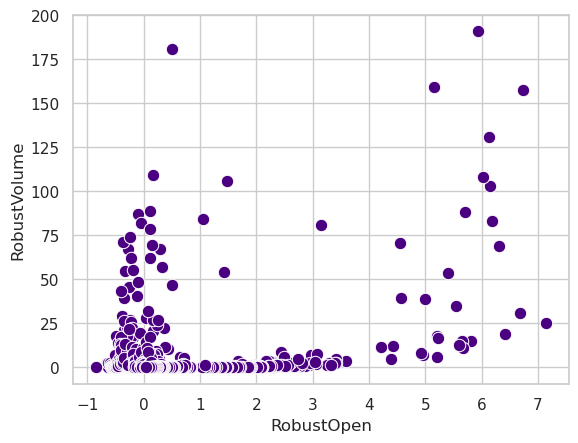

In [36]:
# 산점도를 그려 봅시다.
sns.scatterplot(data=stock_data, x="RobustOpen", y="RobustVolume", color='indigo', marker='o', s=80)

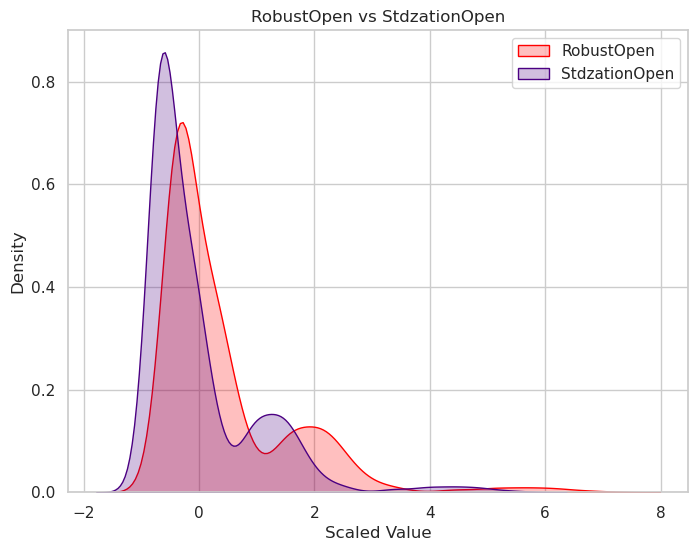

In [37]:
# 표준화와 로버스트 스케일링의 확률밀도 함수를 각각 그려 비교해 봅시다.
scaler = StandardScaler()
stock_data[["StdzationOpen", "StdzationVolume"]] = scaler.fit_transform(stock_data[["Open", "Volume"]])

plt.figure(figsize=(8, 6))

sns.kdeplot(data=stock_data["RobustOpen"], label="RobustOpen", color="red", shade=True)
sns.kdeplot(data=stock_data["StdzationOpen"], label="StdzationOpen", color="indigo", shade=True)

plt.title('RobustOpen vs StdzationOpen')
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2-4 구간화 (Binning, Bucketing)

> 구간화는 연속형 변수를 범주형 변수로 전환시키는 방법입니다. 인간의 나이는 35, 15, 49, 88세 등 연속적인 형태를 가지게 됩니다. 이를 10대, 20대, 30대 등으로 구분하는 것이 구간화입니다. 구간화의 장점은 데이터가 범주화 되기 때문에 학습 모델의 복잡도가 줄어드는 장점이 있습니다.

In [38]:
# 이번에는 종가(Close)를 기준으로 구간화 실습을 해보도록 하곘습니다.
# 주식 애널리스트가 종가를 보기 쉽게 Low, Medium, High로 3가지로 나눠서 본다고 가정해 봅시다.
posco_data = OHLCV_data[OHLCV_data["code"] == "005490"].copy()

# 각 구간을 설정하도록 하겠습니다.
bins = [0, 300000, 500000, 1000000] ## (0원 ~ 3만원) (3만 ~ 5만원) (5만 ~ 10만원) 가격대

# 구간마다 레이블을 정해줍니다.
labels = ["Low", "Medium", "High"]

# Binning을 수행합니다.
posco_data["BinClose"] = pd.cut(posco_data["Close"], bins=bins, labels=labels)

display(posco_data)

,Open,High,Low,Close,Volume,Change,code,BinClose
2018-01-02,335000.0,341000.0,332500.0,339000.0,153013.0,0.019549,005490,Medium
2018-01-03,347000.0,358500.0,346500.0,357500.0,485812.0,0.054572,005490,Medium
2018-01-04,362000.0,370000.0,361000.0,367500.0,416948.0,0.027972,005490,Medium
2018-01-05,369000.0,369500.0,365500.0,368000.0,205202.0,0.001361,005490,Medium
2018-01-08,370000.0,374000.0,363500.0,369500.0,206165.0,0.004076,005490,Medium
...,...,...,...,...,...,...,...,...
2023-07-25,655000.0,679000.0,636000.0,658000.0,5728769.0,0.024922,005490,High
2023-07-26,666000.0,764000.0,599000.0,630000.0,11631776.0,-0.042553,005490,High
2023-07-27,613000.0,649000.0,560000.0,594000.0,7424260.0,-0.057143,005490,High
2023-07-28,586000.0,619000.0,579000.0,619000.0,4114475.0,0.042088,005490,High


In [39]:
posco_data["BinClose"].value_counts()

BinClose
Low       905
Medium    464
High        7
Name: count, dtype: int64

## 3. 범주형 변수 다루기

```
💡 목차 개요 : 범주형 변수에 대해서 알아보고 이를 다루는 방법들에 대해서 알아봅니다.
```

- **3-1 범주형 변수 (Categorical Variable)란?**
- **3-2 원-핫 인코딩 (One-Hot Encoding)**
- **3-3 레이블 인코딩 (Label Encoding)**
- **3-4 빈도 인코딩 (Frequency Encoding)**
- **3-5 타겟 인코딩 (Target Encoding)**



### 3-1 범주형 변수(Categorical Variable)란?

> **데이터를 이산적 범주로 나타낼 수 있는 변수입니다.** 이중 순서가 존재하는 변수를 순서형 변수(Ordinal Variable), 순서 없이 동등한 범주를 나타내는 변수는 명목형 변수(Nominal Variable)로 구분할 수 있습니다. 아럐 예제를 보며 이해해 봅시다.

> **순서형 변수의 예제**
- 학력수준은 [고졸, 대졸, 석사졸, 박사졸]로 구분됩니다.
- 서비스 만족도는 [매우 불만족, 불만족, 보통, 만족, 매우 만족]로 구분될 수 있습니다.


> **명목형 변수의 예제**
- 인간의 성별은 [남자, 여자]로 구분됩니다.
- 국가 이름은 [대한민국, 미국, 일본]으로 구분됩니다.

#### 📝 설명 : (3-1)
> 통계 및 머신러닝&딥러닝 모델에서는 범주형 변수들을 바로 컴퓨터가 인식하기가 어렵답니다. 위의 예제 중 하나인 학력수준을 보더라도 컴퓨터가 고졸, 대졸, 석사졸, 박사졸을 이해하기 어렵겠죠. 그래서 컴퓨터가 이해하기 쉬운 정수형태로 바꿔주는 작업이 필요합니다. 이런 작업을 인코딩이라고하며, 여러 방법들이 존재합니다. 이번 실습에서는 대회나 실무에서 쓰이는 대표적인 인코딩 방법을 배워보도록 하겠습니다.

 📖 설명 : 범주형 변수를 다루는 여러 변환 방법은 크게 4가지로 나눠볼 수 있습니다.
 1. 범주형 변수를 0과 1로 구분하는 원-핫 인코딩
 2. 단순하게 범주를 정수와 매칭하여 변환하는 레이블 인코딩
 3. 변수의 범주의 빈도를 기반으로 변환하는 빈도 인코딩
 4. 변환하려는 변수 외 타 변수의 통계치를 이용한 타겟 인코딩

### 3-2 원-핫 인코딩 (One-Hot Encoding)

> 범주형 변수를 0과 1로만 구성된 이진(Binary) 형태로 변환하는 방법입니다. 변수의 고유(Unique) 범주 크기와 동일한 이진 벡터가 생성됩니다.<br> 범주에 해당하는 값은 1, 나머지는 0으로 변환하게 됩니다.

#### 📝 설명 : (3-2)
- 원-핫 인코딩은 변수의 이진화를 통해 컴퓨터가 인식하기 용이하게 변환해줍니다.
- 즉, 알고리즘 모델이 변수의 의미를 정확하게 파악할 수 있습니다.

---

- 고유 범주의 크기가 늘어날 때마다 벡터의 차원이 늘어나는 문제가 존재합니다.
- 벡터의 차원이 늘어나면 연산량 및 메모리에 문제가 발생합니다.

In [40]:
onehot_data = OHLCV_data.copy()

# scikit-learn에서 제공하는 OneHotEncoder 클래스를 활용해 종목(code)열의 One-Hot Encoding을 진행해 봅시다.
# OneHotEncoder의 클래스 객체를 생성합니다.
encoder = OneHotEncoder()

# 원-핫 인코딩에서는 2차원 형태의 배열로 입력해야 하기 때문에 대괄호([])가 2개가 들어갑니다.
onehot = encoder.fit_transform(onehot_data[["code"]])

# 배열형태로 전환
onehot_array = onehot.toarray()

# 종목의 고유 범주수 999개인 것과 동일하게 999차원의 원-핫 인코딩 배열이 생겼습니다.
# 이는 데이터셋의 규모가 커질 때 메모리에 영향을 줄수 있습니다.
display(onehot_array)
display(f"종목 고유 범주 수 : {len(onehot_data['code'].unique())}")
display(f"원-핫 인코딩의 차원 수 : {onehot_array.shape}")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

'종목 고유 범주 수 : 999'

'원-핫 인코딩의 차원 수 : (1272310, 999)'

In [42]:
# 5개의 샘플만 확인해보도록 하겠습니다.
onehot_data_sample = onehot_data[:5]
onehot_data_sample["OnehotCode"] = onehot_array[:5].tolist()

display(onehot_data_sample)

,Open,High,Low,Close,Volume,Change,code,OnehotCode
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [43]:
display(f"삼성전자의 원-핫 코드: {onehot_data_sample[onehot_data_sample['code'] == '005930']['OnehotCode'][0]}")

'삼성전자의 원-핫 코드: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### 3-3 레이블 인코딩 (Label Encoding)

> 위의 이진 벡터로 표현하는 원-핫 인코딩과는 다르게 각 범주를 정수에 1:1로 매칭시키는 방법입니다. <br> 하나의 변수(컬럼)으로 모든 범주를 표현 가능한 장점이 있습니다.
#### 📝 설명 : (3-3)
- 범주 하나당 하나의 정수로 간단하게 표현 가능합니다.
- 메모리 관리 측면에서 효율적입니다.

---

- 순서가 존재하지 않는 변수에 적용 할 경우 알고리즘 오해석 가능성이 존재합니다. (변수간 상대적 크기를 비교하는 알고리즘)

In [44]:
label_data = OHLCV_data.copy()

# scikit-learn의 LabelEncoder 클래스 객체를 생성합니다.
encoder = LabelEncoder()

# 레이블 인코딩 변환
label = encoder.fit_transform(label_data[["code"]])

# 결과를 기존 데이터셋에 추가해볼까요?
label_data["LabelCode"] = label

display(label_data)

,Open,High,Low,Close,Volume,Change,code,LabelCode
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930,317
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930,317
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930,317
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930,317
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930,317
...,...,...,...,...,...,...,...,...
2018-03-13,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,378
2018-03-14,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,378
2018-03-15,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,378
2018-03-16,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,378


In [45]:
display(f"레이블 인코딩의 범주 크기: {len(label_data['LabelCode'].unique())}")
display(f"레이블 인코딩의 범주 범위: {label_data['LabelCode'].min()} ~ {label_data['LabelCode'].max()}")

'레이블 인코딩의 범주 크기: 999'

'레이블 인코딩의 범주 범위: 0 ~ 998'

In [46]:
display(f"삼성전자의 인코딩 값: {label_data[label_data['code'] == '005930']['LabelCode'][0]}")
display(f"LG전자의 인코딩 값: {label_data[label_data['code'] == '066570']['LabelCode'][0]}")

'삼성전자의 인코딩 값: 317'

'LG전자의 인코딩 값: 690'

### 3-4 빈도 인코딩 (Frequency Encoding)

> 빈도 인코딩은 특정 관측치의 빈도가 높을 수록 높은 정값을, 빈도가 낮을 수록 낮은 정수 값을 부여받게 되는 형태입니다. <br>
Count Encoding이라고도 불립니다.
#### 📝 설명 : (3-4)
- 빈도라는 수치적인 의미를 변수에 부여 가능합니다.
- 한가지 변수로 표현 가능하기 때문에 메모리 관리 측면에서 효율적입니다.

---

- 다른 특성의 의미를 지니고 있어도 빈도가 같으면, 다른 범주간 의미가 동일하게 인식될 수 있는 가능성이 있습니다.

#### 👨‍💻 코드 : (3-4)
- scikit-learn에서는 아쉽게도 FrequencyEncoder를 제공하지 않습니다.
- 대신 category_encoders라는 패키지를 설치하여 CountEncoder를 사용해봅시다.

In [47]:
frequency_data = OHLCV_data.copy()

# CountEncoder를 클래스 객체를 생성합니다.
# cols에는 적용할 열을 명시해줍니다.
encoder = CountEncoder(cols=['code'])

# 변환시켜줍시다.
frequency = encoder.fit_transform(frequency_data['code'])

frequency_data["FrequencyCode"] = frequency

display(frequency_data)

,Open,High,Low,Close,Volume,Change,code,FrequencyCode
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930,1376
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930,1376
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930,1376
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930,1376
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930,1376
...,...,...,...,...,...,...,...,...
2018-03-13,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,52
2018-03-14,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,52
2018-03-15,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,52
2018-03-16,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,52


In [48]:
# 삼성전자 및 LG전자 모두 code 빈도가 동일하기 때문에 같은 값을 갖게 되었습니다.
# 어느정도 파악하셨겠지만 빈도 수라는 수치적인 의미를 반영하지 않는다면 효과적이지가 않습니다.
display(f"삼성전자의 인코딩 값: {frequency_data[frequency_data['code'] == '005930']['FrequencyCode'][0]}")
display(f"LG전자의 인코딩 값: {frequency_data[frequency_data['code'] == '066570']['FrequencyCode'][0]}")

'삼성전자의 인코딩 값: 1376'

'LG전자의 인코딩 값: 1376'

### 3-5 타겟 인코딩 (Target Encoding)

> 타겟 인코딩은 타겟 변수를 선정하고, 이를 집계하여 통계량(평균)으로 인코딩하는 방식입니다.  <br>
범주형 변수가 연속적인 특성을 가진 값으로 변환됩니다. <br>
Mean Encoding으로도 불립니다.

#### 📝 설명 : (3-5)
- 범주간 수치적인 의미를 변수에 부여 가능합니다.
- 타겟 변수라는 추가적인 정보를 가진 변수에 의존하므로 파생 변수와 비슷합니다.

---

- 과적합이나 Data-Leakage에 대한 문제가 발생할 수 있습니다.

#### 👨‍💻 코드 : (3-5)
- pandas를 이용해 Target Encoding을 진행합니다.
- 범주형 변수 외에, 평균값을 구하기 위한 연속적 특성을 가진 타겟 변수가 필요합니다.
- 여기서는 Open(시가) 열을 타겟 변수라고 가정하겠습니다.

In [49]:
target_data = OHLCV_data.copy()

# 우선 pandas에서 제공하는 groupby를 통해 code열을 기준으로 Open열의 평균을 구해봅시다.
target = target_data.groupby(OHLCV_data['code'])['Open'].mean()

# map을 이용해 변환해줍니다.
target_data['TargetCode'] = target_data['code'].map(target)

display(target_data)

,Open,High,Low,Close,Volume,Change,code,TargetCode
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930,59413.255814
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930,59413.255814
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930,59413.255814
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930,59413.255814
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930,59413.255814
...,...,...,...,...,...,...,...,...
2018-03-13,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,13319.230769
2018-03-14,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,13319.230769
2018-03-15,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,13319.230769
2018-03-16,0.0,0.0,0.0,19950.0,0.0,0.000000,008000,13319.230769


In [50]:
display(f"삼성전자의 타겟 인코딩 값: {target_data[target_data['code'] == '005930']['TargetCode'][0]}")
display(f"LG전자의 타겟 인코딩 값: {target_data[target_data['code'] == '066570']['TargetCode'][0]}")

'삼성전자의 타겟 인코딩 값: 59413.25581395349'

'LG전자의 타겟 인코딩 값: 98219.07703488372'